In [0]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
local_zip = '/content/drive/My Drive/pothole-and-plain-rode-images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('acc')>0.99):
      print("\n 99% accuracy reached so cancelling training")
      self.model.stop_training=True

In [18]:
print(len(os.listdir('/tmp/My Dataset/train/Pothole/')))
print(len(os.listdir('/tmp/My Dataset/train/Plain/')))
print(len(os.listdir('/tmp/My Dataset/test/Pothole/')))
print(len(os.listdir('/tmp/My Dataset/test/Plain/')))
callbacks=mycallback()

357
367
8
8


In [19]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
   
    tf.keras.layers.Dense(512, activation='relu'), 
 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])
model.summary()

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])
model.save("deepak.h5")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 32)        18464     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 32)       

In [20]:
base='/tmp/My Dataset/train'
train_dir = base
train_datagen = ImageDataGenerator(rescale = 1.0/255. )
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150)) 
base1='/tmp/My Dataset/test'
val_dir = base1
validation_datagen = ImageDataGenerator(rescale = 1.0/255. )
validation_generator =train_datagen.flow_from_directory(val_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150)) 




Found 723 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [22]:
history = model.fit_generator(train_generator,
                              epochs=20,steps_per_epoch=723//16,
                              verbose=1,
                              validation_data=validation_generator,validation_steps=16//16,callbacks=[callbacks])

Epoch 1/20
 9/45 [=====>........................] - ETA: 12s - loss: 0.0463 - acc: 0.9889

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


45/45 [==============================] - 17s 381ms/step - loss: 0.0588 - acc: 0.9751 - val_loss: 0.8787 - val_acc: 0.8750
Epoch 2/20
45/45 [==============================] - 18s 409ms/step - loss: 0.0721 - acc: 0.9762 - val_loss: 0.9129 - val_acc: 0.8125
Epoch 3/20
45/45 [==============================] - 16s 351ms/step - loss: 0.0433 - acc: 0.9796 - val_loss: 1.0406 - val_acc: 0.8750
Epoch 4/20
45/45 [==============================] - 17s 372ms/step - loss: 0.0747 - acc: 0.9792 - val_loss: 1.1567 - val_acc: 0.8750
Epoch 5/20
45/45 [==============================] - 16s 364ms/step - loss: 0.0303 - acc: 0.9875 - val_loss: 1.4213 - val_acc: 0.8125
Epoch 6/20
45/45 [==============================] - ETA: 0s - loss: 0.0271 - acc: 0.9921
 99% accuracy reached so cancelling training
45/45 [==============================] - 17s 382ms/step - loss: 0.0271 - acc: 0.9921 - val_loss: 1.6102 - val_acc: 0.8125


Saving 1.jpg to 1.jpg
[1.]
1.jpg is a Obstacle


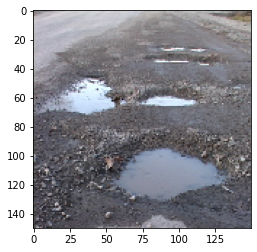

In [28]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt



uploaded = files.upload()

for fn in uploaded.keys():
 
 
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a Obstacle")
  else:
    print(fn + " is a not an Obstacle")
  plt.imshow(img)
  plt.show()

In [0]:
train_pothole_dir = os.path.join('/tmp/My Dataset/train/Pothole')


train_plain_dir = os.path.join('/tmp/My Dataset/train/Plain')

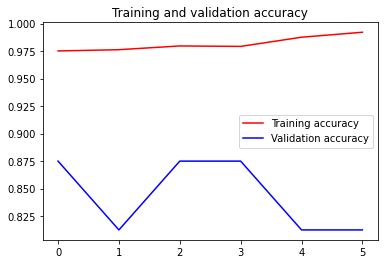

<Figure size 432x288 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [0]:
train_pothole_names = os.listdir(train_pothole_dir)
train_plain_names = os.listdir(train_plain_dir)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


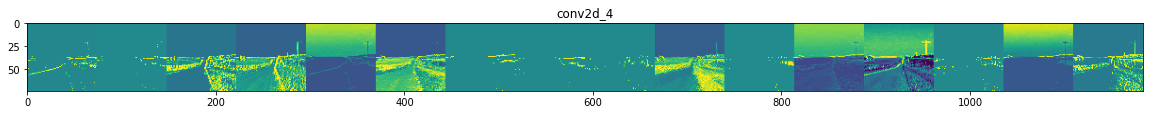

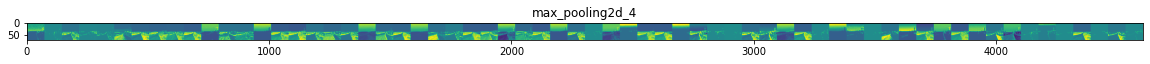

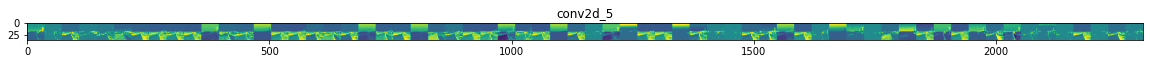

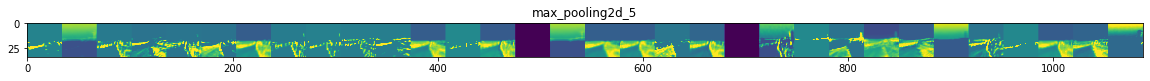

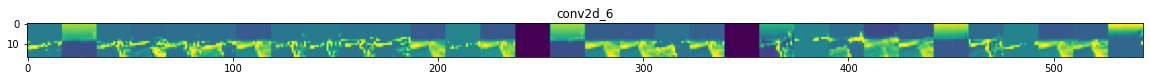

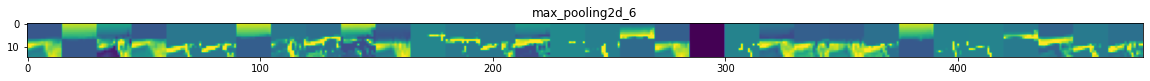

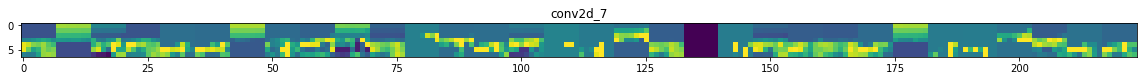

In [27]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from matplotlib import pyplot as plt


successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

pothole_img_files = [os.path.join(train_pothole_dir, f) for f in train_pothole_names]
plain_img_files = [os.path.join(train_plain_dir, f) for f in train_plain_names]
img_path = random.choice(pothole_img_files + plain_img_files)

img = load_img(img_path, target_size=(150, 150))  
x = img_to_array(img)  
x = x.reshape((1,) + x.shape)  


x /= 255


successive_feature_maps = visualization_model.predict(x)


layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    
    n_features = feature_map.shape[-1]  
   
    size = feature_map.shape[1]
 
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      
      display_grid[:, i * size : (i + 1) * size] = x
  
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [0]:
import os, signal

os.kill(     os.getpid() , 
         signal.SIGKILL
       )